<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/TJC_CV2_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** [GIT HUB ](https://github.com/JarvisSan22/JC_learn_python_Notebooks)**

* [日本語版の記事]()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

from skimage.metrics import structural_similarity
import numpy as np
import os, cv2, random
import matplotlib.pyplot as plt 
import glob
from  tqdm import tqdm

#CV2 Resize Test 1 
[Solafune](https://solafune.com/competitions/3c7a473f-61f4-472f-a812-92eb07cc4541) data set link. But there data liences does allow people to use it to show images publicly so we are goint to use LandCover.ai for the visluaitons 

[LandCover.ai](https://solafune.com/competitions/3c7a473f-61f4-472f-a812-92eb07cc4541)

In [4]:
datadir="/content/drive/MyDrive/Datasets/landcover_ai_v1"
f_h1=datadir+"/images/N-33-139-C-d-2-2.tif"
img1=cv2.imread(f_h1)
print(img1.shape)
f_h2="/content/drive/MyDrive/Datasets/landcover_ai_v1/images/M-34-68-B-a-1-3.tif"
img2=cv2.imread(f_h2)
print(img2.shape)

(9706, 9042, 3)
(9594, 9243, 3)


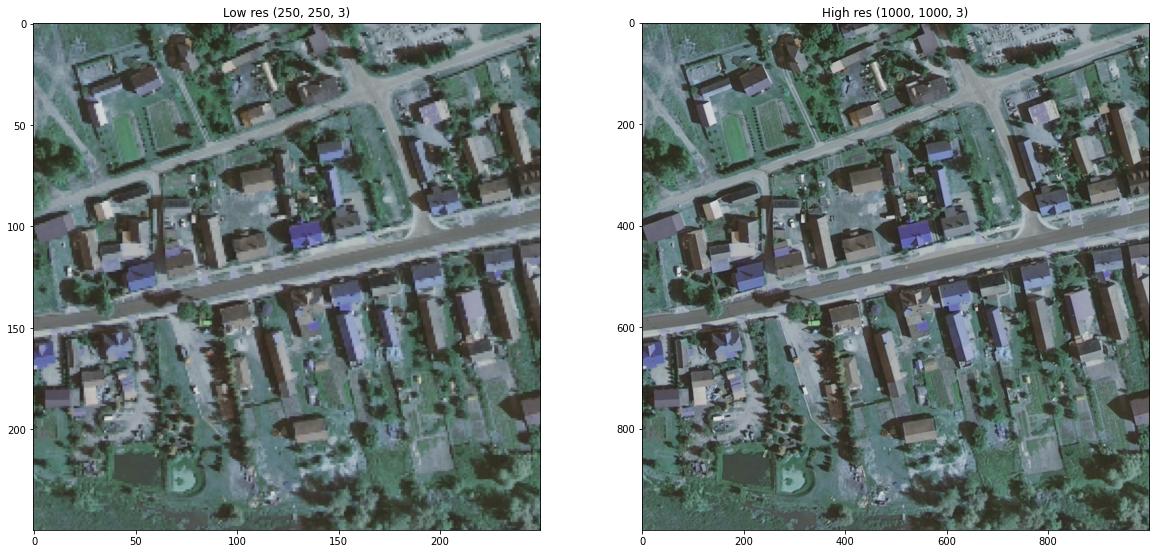

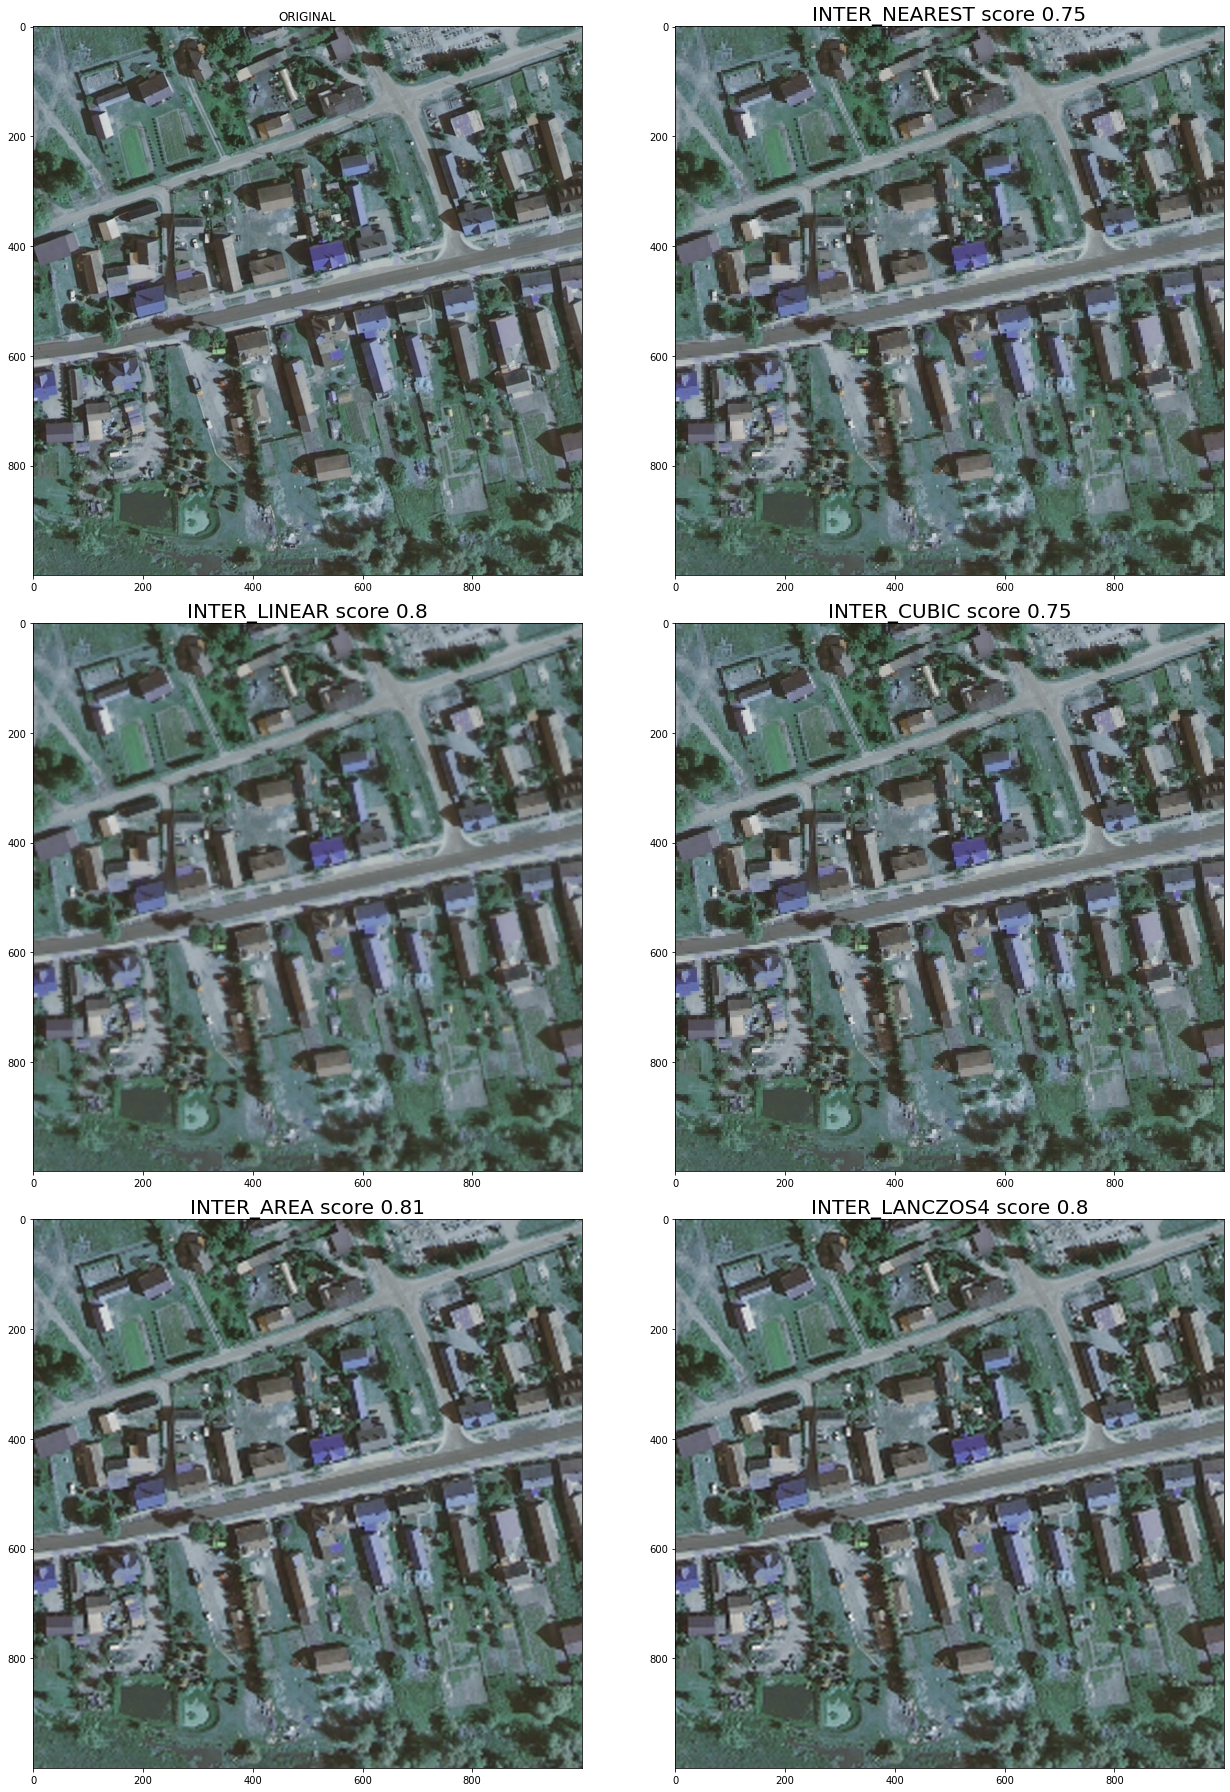

In [5]:

datadir="/content/drive/MyDrive/Datasets/landcover_ai_v1"
f_h=datadir+"/images/N-33-139-C-d-2-2.tif"

img_h=cv2.imread(f_h)[500:1500,500:1500,:]

h,w,c=img_h.shape
resize=(w,h)
factor = 4
img_l=cv2.resize(img_h,(w//factor,h//factor),200)
img_s=cv2.resize(img_l,(w,h),interpolation = cv2.INTER_AREA)

#Low res and high rest compare plot 
fig,axs=plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(img_l)
axs[0].set_title(f"Low res {img_l.shape}")
axs[1].imshow(img_h)
axs[1].set_title(f"High res {img_h.shape}")


#resizeのオプション
interpolations=["ORIGINAL",cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
fig,axs=plt.subplots(3,2,figsize=(20,25))
axs=axs.reshape(-1)

out_dic={}

for ax,inter in zip(axs,interpolations):

  if inter == "ORIGINAL":
    ax.imshow(img_h)
    ax.set_title("ORIGINAL")
    out_dic["ORIGINAL"]=[1,img_h]
  
  else:
    img_pl_resize=cv2.resize(img_l.copy(),resize,interpolation=inter)
    score=structural_similarity(img_h,img_pl_resize, multichannel=True)
    out_dic[interpolation_names[inter]]=[score, img_pl_resize]
    ax.imshow(img_pl_resize)
    ax.set_title(interpolation_names[inter]+f" score {round(score,2)}",fontsize=20)
  
  fig.tight_layout()

# CV2 Resize Evaluation 

In [ ]:
def Eval_resize(img_o,img_r):
  rx,ry=img_o.shape[0:2]
  resize=(ry,rx)
  #resizeのオプション
  interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
  interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
  out_dic={}
  for inter in interpolations:
    img_resize=cv2.resize(img_r.copy(),resize,interpolation=inter)
    score=structural_similarity(img_o,img_resize, multichannel=True)
    out_dic[interpolation_names[inter]]=[score]
  return out_dic  

In [ ]:
import pandas as pd
datadir="/content/drive/MyDrive/Datasets/landcover_ai_v1"
files=glob.glob(datadir+"/images/***.tif")
df= pd.DataFrame()
i=0
for f in tqdm(files,total=len(files)):
    img_h=cv2.imread(f)[0:1000,0:1000,:]
    h,w,c=img_h.shape
    img_l=cv2.resize(img_h,(w//factor,h//factor),200)
    score_dict=Eval_resize(img_h,img_l)
    df_l=pd.DataFrame(index=[i],data=score_dict)
    df=pd.concat([df,df_l],axis=0)
    i+=1



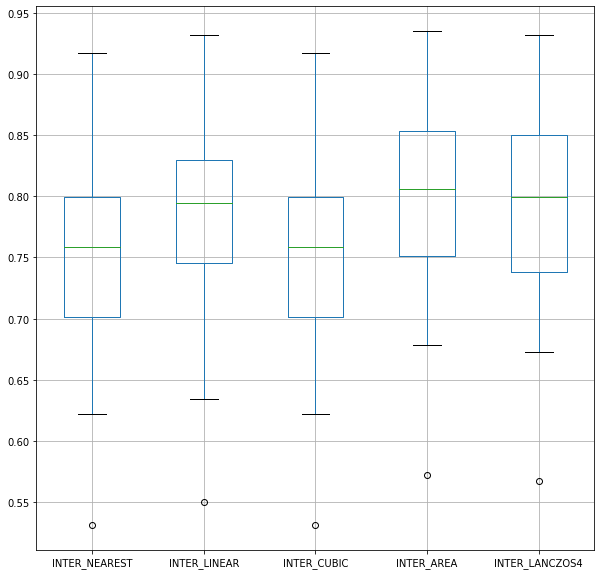

In [11]:
fig=plt.figure(figsize=(10,10))
ax=df2.boxplot()

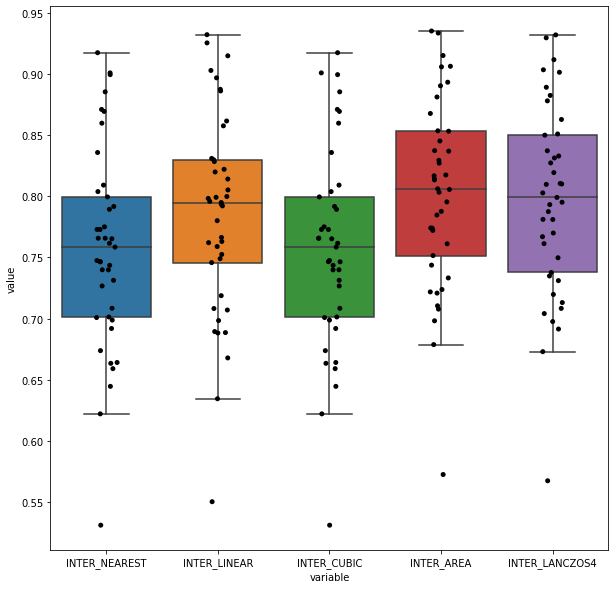

In [9]:
fig=plt.figure(figsize=(10,10))
df_melt = pd.melt(df2)
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black')

 # Solafune　のデータセットを扱うコード

In [36]:

import pandas as pd 
df= pd.DataFrame()
datadir="/content/drive/MyDrive/Datasets/sat_highres"
i=0
files=sorted(glob.glob(datadir+"/train/****low.tif"))

for f_l in tqdm(files,total=len(files)): 
  f_h=f_l.replace("low","high")
  img_h=cv2.imread(f_h)
  img_l=cv2.imread(f_l)
  score_dict=Eval_resize(img_h,img_l)
  df_l=pd.DataFrame(index=[i],data=score_dict)
  df=pd.concat([df,df_l],axis=0)
  i+=1

In [40]:
len(df)

60

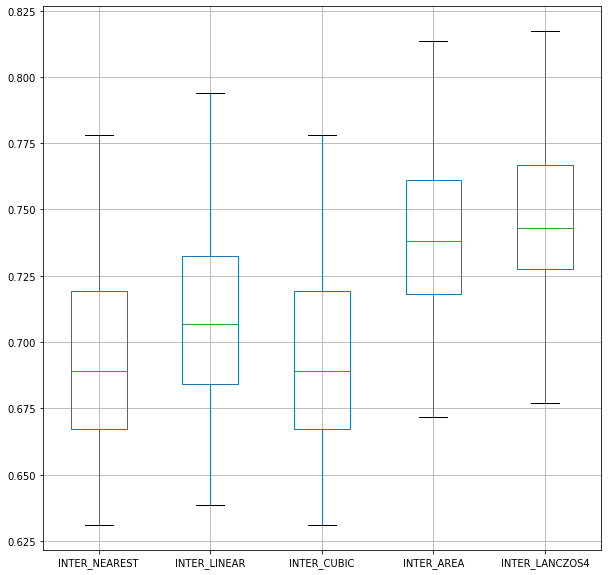

In [37]:
fig=plt.figure(figsize=(10,10))
ax=df.boxplot()

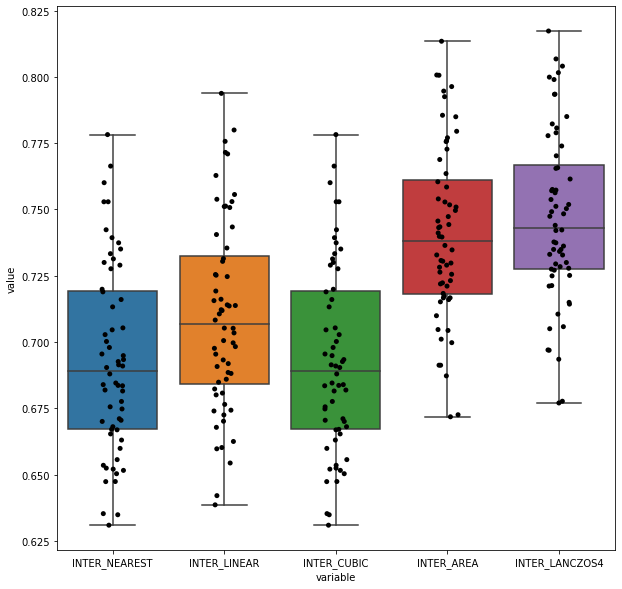

In [38]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
df_melt = pd.melt(df)
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black')

 # Test your own image 
 

In [ ]:


def plot_resize_test(img_h,img_l):

  dim_h=img_h.shape
  rx,ry=dim_h[0:2]
  resize=(ry,rx)

  #resizeのオプション
  interpolations=["ORIGINAL",cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
  interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
  fig,axs=plt.subplots(3,2,figsize=(10,15))
  axs=axs.reshape(-1)
  
  out_dic={}

  for ax,inter in zip(axs,interpolations):

    if inter == "ORIGINAL":
      ax.imshow(img_h)
      ax.set_title("ORIGINAL")
      out_dic["ORIGINAL"]=[1,img_h]
    
    else:
      img_pl_resize=cv2.resize(img_l.copy(),resize,interpolation=inter)
      print(dim_h,img_pl_resize.shape)

      score=structural_similarity(img_h,img_pl_resize, multichannel=True)
      out_dic[interpolation_names[inter]]=[score, img_pl_resize]
      ax.imshow(img_pl_resize)
      ax.set_title(interpolation_names[inter]+f" score {round(score,2)}")
    
    fig.tight_layout()

Saving Face.png to Face.png
(631, 405, 3)
(631, 405, 3) (63, 40, 3)


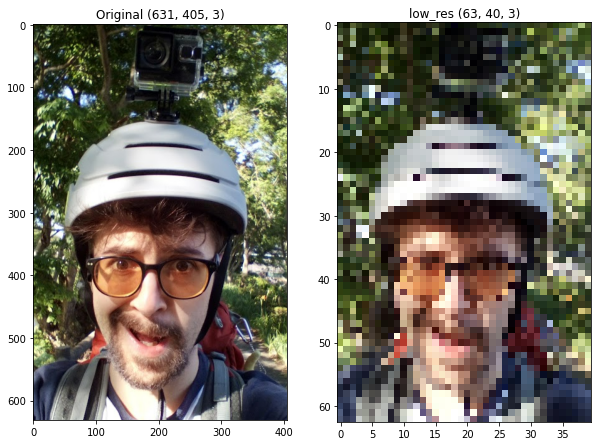

In [ ]:
def upload_file(): 
  from google.colab import files 
  uploaded = files.upload() 
  for k, v in uploaded.items(): 
    open(k, 'wb').write(v) 
  return list(uploaded.keys())[0] 
file=upload_file()
img=cv2.imread(file)[:,:,::-1]
dim=img.shape
print(dim)
scale=10
resize_down=(dim[1]//scale,dim[0]//scale) #downsize to test
img_low=cv2.resize(img,(resize_down))
print(dim,img_low.shape)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title(f'Original {dim}')
ax2.imshow(img_low)
ax2.set_title(f'low_res {img_low.shape}')
plt.show()



(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)


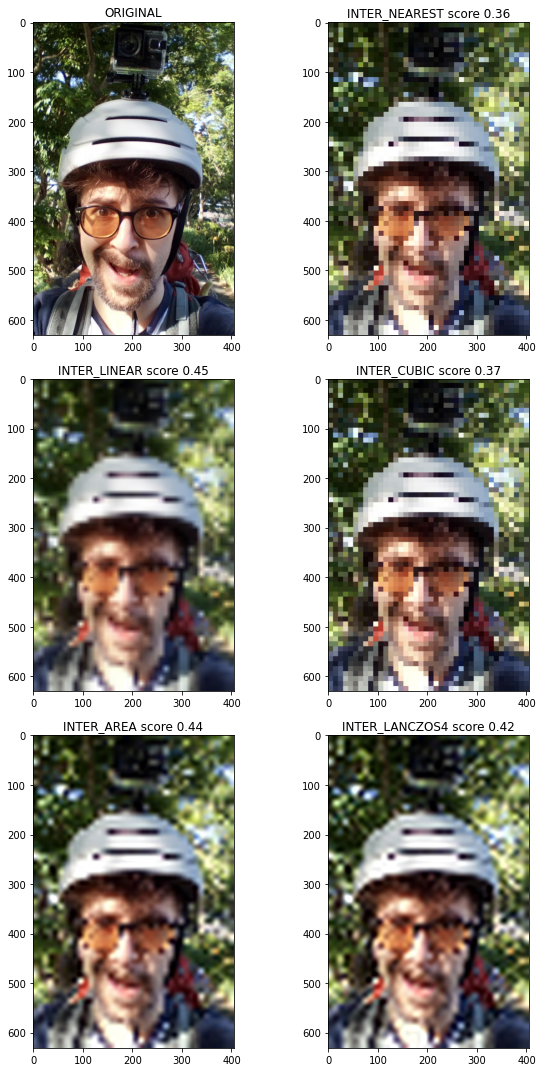

In [ ]:
plot_resize_test(img,img_low)